In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from xgboost import XGBClassifier

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
import plotly.figure_factory as ff

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

In [3]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
import math
from math import *

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import f1_score
import sklearn.metrics as metrics


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [4]:
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [5]:
data = pd.read_csv("./data/diabetes.csv")

In [6]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

In [7]:
df.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [10]:
target_count()
target_percent()

In [11]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
count       768.00   768.00         768.00         768.00   768.00 768.00                    768.00 768.00   768.00
mean          3.85   120.89          69.11          20.54    79.80  31.99                      0.47  33.24     0.35
std           3.37    31.97          19.36          15.95   115.24   7.88                      0.33  11.76     0.48
min           0.00     0.00           0.00           0.00     0.00   0.00                      0.08  21.00     0.00
25%           1.00    99.00          62.00           0.00     0.00  27.30                      0.24  24.00     0.00
50%           3.00   117.00          72.00          23.00    30.50  32.00                      0.37  29.00     0.00
75%           6.00   140.25          80.00          32.00   127.25  36.60                      0.63  41.00     1.00
max          17.00   199.00         122.00          99.00   846.00  67.10                      2.42  81.00     1.00

In [12]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

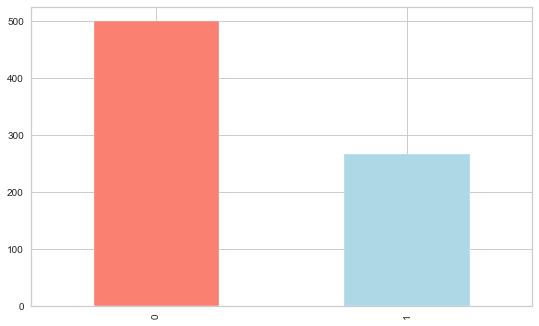

In [13]:
data.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [14]:
# Checking for messing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


In [16]:
categorical_val

['Outcome']

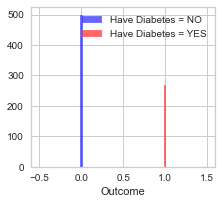

In [17]:
plt.figure(figsize=(10, 10))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

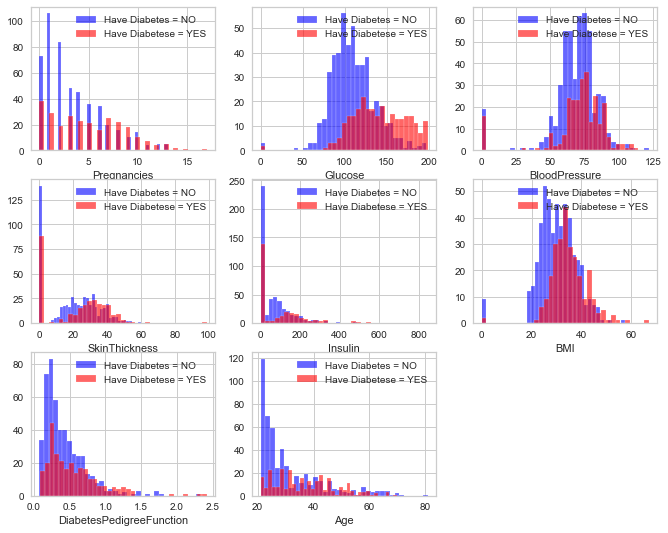

In [18]:
plt.figure(figsize=(10, 9))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetese = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

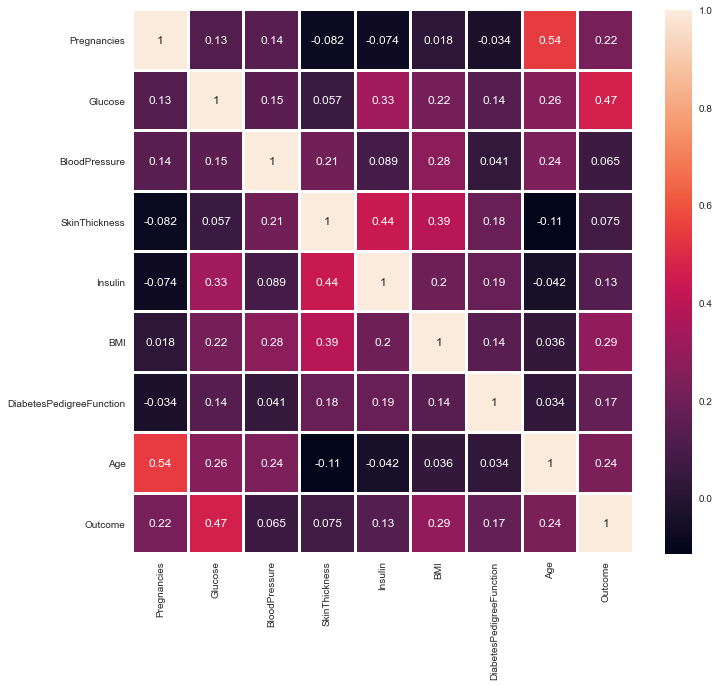

In [19]:
#checking correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

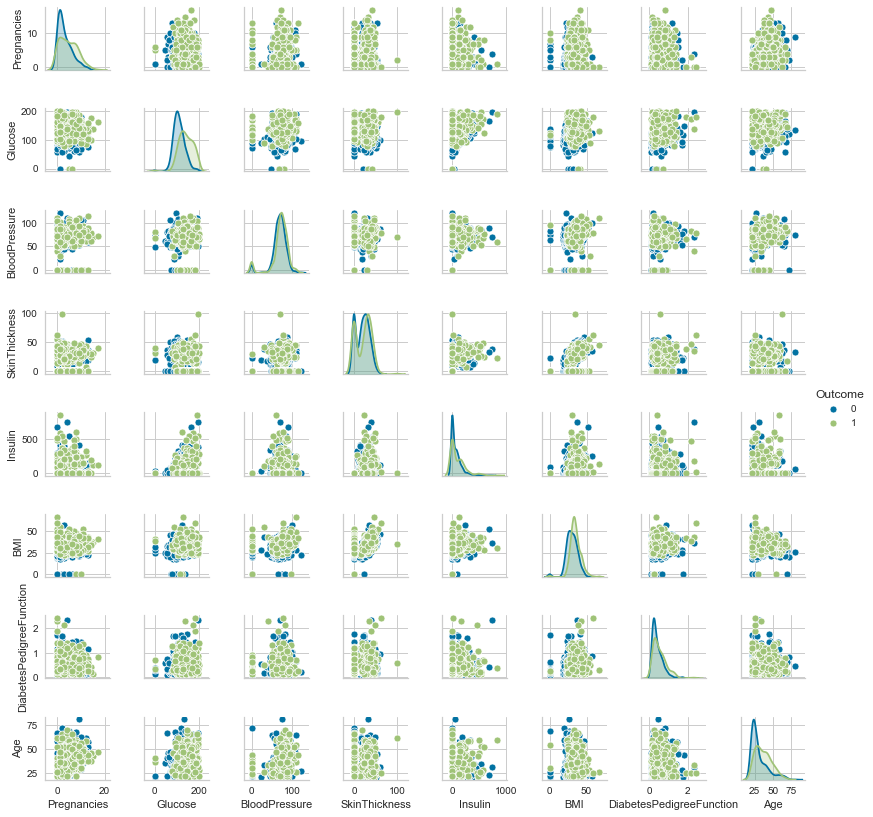

In [20]:
p=sns.pairplot(data,height=1.4, hue = 'Outcome')

(9.5, -0.5)

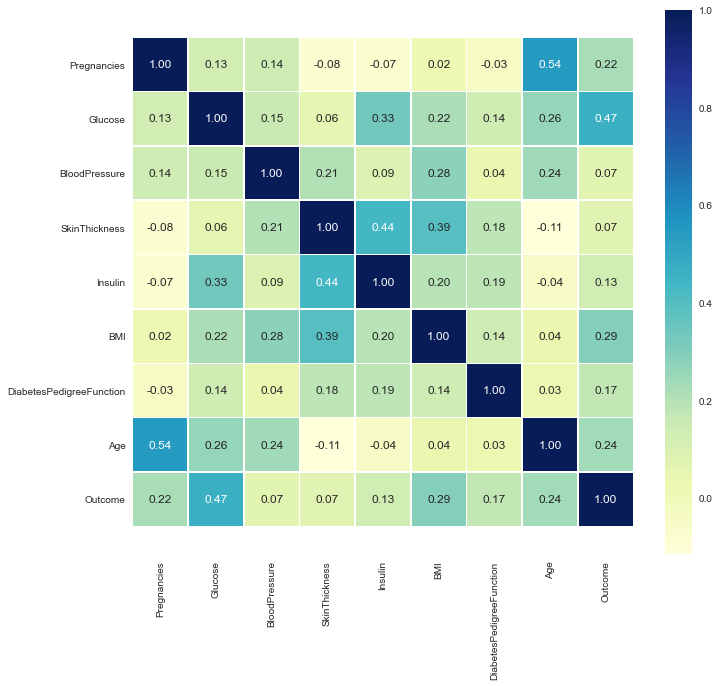

In [21]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

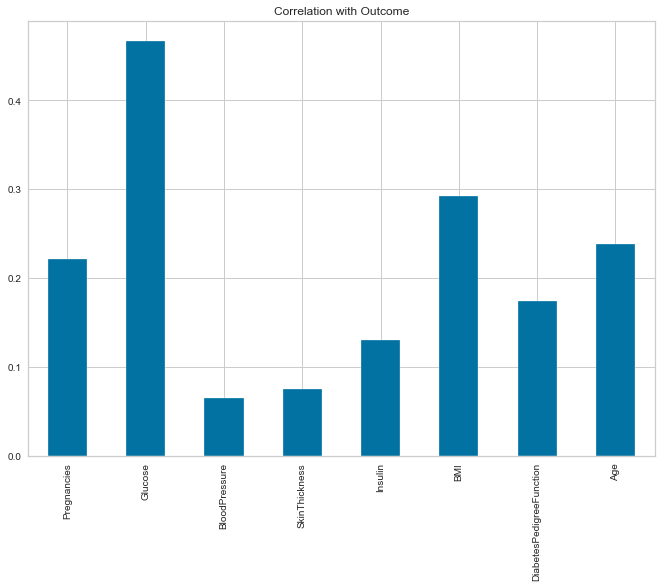

In [22]:
df.drop('Outcome', axis=1).corrwith(df.Outcome).plot(kind='bar', grid=True, figsize=(10, 8), 
                                                   title="Correlation with Outcome")

In [23]:
categorical_val.remove('Outcome')
dataset = pd.get_dummies(df, columns = categorical_val)

In [24]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

In [25]:
print(df.columns)
print(dataset.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [26]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [27]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0         0.64     0.85           0.15           0.91    -0.69 33.60                      0.63   50        1
1        -0.84    -1.12          -0.16           0.53    -0.69 26.60                      0.35   31        0
2         1.23     1.94          -0.26          -1.29    -0.69 23.30                      0.67   32        1
3        -0.84    -1.00          -0.16           0.15     0.12 28.10                      0.17   21        0
4        -1.14     0.50          -1.50           0.91     0.77 43.10                      2.29   33        1

In [28]:
zero_not_accepted =["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_not_accepted:
    data[col].replace(0, np.nan, inplace=True)


data.head(n=5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6   148.00          72.00          35.00      nan 33.60                      0.63   50        1
1            1    85.00          66.00          29.00      nan 26.60                      0.35   31        0
2            8   183.00          64.00            nan      nan 23.30                      0.67   32        1
3            1    89.00          66.00          23.00    94.00 28.10                      0.17   21        0
4            0   137.00          40.00          35.00   168.00 43.10                      2.29   33        1

In [29]:
#imputing mean instead of null values
for col in zero_not_accepted:
    data[col].replace(np.nan, data[col].mean(), inplace=True)

In [30]:
#summary statistics
data.describe()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
count       768.00   768.00         768.00         768.00   768.00 768.00                    768.00 768.00   768.00
mean          3.85   121.69          72.41          29.15   155.55  32.46                      0.47  33.24     0.35
std           3.37    30.44          12.10           8.79    85.02   6.88                      0.33  11.76     0.48
min           0.00    44.00          24.00           7.00    14.00  18.20                      0.08  21.00     0.00
25%           1.00    99.75          64.00          25.00   121.50  27.50                      0.24  24.00     0.00
50%           3.00   117.00          72.20          29.15   155.55  32.40                      0.37  29.00     0.00
75%           6.00   140.25          80.00          32.00   155.55  36.60                      0.63  41.00     1.00
max          17.00   199.00         122.00          99.00   846.00  67.10                      2.42  81.00     1.00

In [31]:
# creating the training data
X = data.drop(["Pregnancies", "Outcome"], axis=1)
y = data['Outcome']

In [32]:
X.shape, y.shape

((768, 7), (768,))

Apply foward and backward method 

In [33]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

Forward method = True

In [34]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [35]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-08-23 19:59:14] Features: 1/4 -- score: -0.17311495646464525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-08-23 19:59:14] Features: 2/4 -- score: -0.1638895068318647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-08-23 19:59:14] Features: 3/4 -- score: -0.16142485097792642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [36]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [37]:
# creating a new dataframe using the above variables and adding the target variable
new_data = data[feat_names]
new_data['Outcome'] = data['Outcome']

# first five rows of the new data
new_data.head()

Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0   148.00 33.60                      0.63   50        1
1    85.00 26.60                      0.35   31        0
2   183.00 23.30                      0.67   32        1
3    89.00 28.10                      0.17   21        0
4   137.00 43.10                      2.29   33        1

In [38]:
# shape of new and original data
new_data.shape, data.shape

((768, 5), (768, 9))

Backward method = False

In [39]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, )

In [40]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [41]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [42]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [43]:
new_data = data[feat_names]
new_data['Outcome'] = data['Outcome']

new_data.head()

Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0   148.00 33.60                      0.63   50        1
1    85.00 26.60                      0.35   31        0
2   183.00 23.30                      0.67   32        1
3    89.00 28.10                      0.17   21        0
4   137.00 43.10                      2.29   33        1

In [44]:
# shape of new and original data
new_data.shape, data.shape

((768, 5), (768, 9))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

In [46]:
#extracting input and output features
X = data.iloc[:, :-1].to_numpy()
Y = data.iloc[:, -1].to_numpy()

In [73]:
# Custom Function to get Scores and plots...
def Generate_Model_Train_Classification_Report(model, X_train, y_train, model_name=""):

    '''
    Purpose: 
        Generate the consolidated test classification report. 
        The report consists of the following classification results & metrics -
            1. Confusion Matrix
            2. Classification Report
            3. F1 Score
            4. Accuracy
            5. Mathews Correlation Coefficient (MCC)
            6. Precision
            7. Recall
            8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
            9. AUC-PR Score - Area Under the Precision Recall Curve.
            10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
            11. AUC-PR Curve - Area Under the Precision Recall Curve.

    Parameters:
        1. y_train - The Ground Truth for each test image.
        2. y_pred - The Predicted label for each image.
        3. model_name - Model Name

    Return Value: 
        NONE.
    '''

    # Report Title & Classification Mterics Abbreviations...
    fig, axes = plt.subplots(3, 1, figsize = (8, 3))
    axes[0].text(9, 1.8, "MODEL TRAIN REPORT", fontsize=30, horizontalalignment='center', 
                 color='DarkBlue', weight = 'bold')

    axes[0].axis([0, 10, 0, 10])
    axes[0].axis('off')

    axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                         fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')

    axes[2].text(0, 4, "* 1 - Diabetes\t\t\t\t\t\t\t * 0 - Not Diabetes\n".expandtabs() +
                 "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                 "* ROC - Receiver Operating Characteristics     " + 
                 "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                 style='italic', fontsize=10, horizontalalignment='left', color='orangered')

    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')

    scores = []
    metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
               'AUC_ROC  ', 'AUC_PR   ']

    # Plot ROC and PR curves using all models and test data...
    y_pred = model.predict(X_train.values)
    y_pred_probs = model.predict_proba(X_train.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), y_pred)
    precision, recall, th = precision_recall_curve(y_train.values.ravel(), y_pred_probs)

    # Calculate the individual classification metic scores...
    model_f1_score = f1_score(y_train, y_pred)
    model_matthews_corrcoef_score = matthews_corrcoef(y_train, y_pred)
    model_precision_score = precision_score(y_train, y_pred)
    model_recall_score = recall_score(y_train, y_pred)
    model_accuracy_score = accuracy_score(y_train, y_pred)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(recall, precision)

    scores.append([model_f1_score,
                   model_matthews_corrcoef_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr])

    sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
    for i in range(len(scores[0])):
        sampling_results.loc[i] = [metrics[i], scores[0][i]]

    sampling_results.index = np.arange(1, len(sampling_results) + 1)

    class_report = classification_report(y_train, y_pred)
    conf_matx = confusion_matrix(y_train, y_pred)

    # Display the Confusion Matrix...
    fig, axes = plt.subplots(1, 3, figsize = (20, 4))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
    axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                      style='italic', loc='left', y=0.80)

    # Classification Metrics
    axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                 fontsize=20, horizontalalignment='center')
    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')
    axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    # Classification Report
    axes[2].text(0, 1, class_report, style='italic', fontsize=20)
    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')
    axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    plt.tight_layout()
    plt.show()

    # AUC-ROC & Precision-Recall Curve
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=1, y=1.05)

    axes[1].legend(loc = "lower left")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=3, y=1.05)

    plt.subplots_adjust(top=0.95) 
    plt.tight_layout()
    plt.show()
    
##########################################################################################################################
    
def plot_model_feature_importances(model):
    '''
    Custom function to plot the 
    feature importances of the classifier.
    '''
    fig = plt.figure()
    
    # get the feature importance of the classifier 'model'
    feature_importances = pd.Series(model.feature_importances_,
                            index = X_train.columns) \
                    .sort_values(ascending=False)
    
    # plot the bar chart
    sns.barplot(x = feature_importances, y = X_train.columns)
    plt.title('Classifier Feature Importance', fontdict = {'fontsize' : 20})
    plt.xticks(rotation = 60)
    plt.show()

Model Building & Training
To predict patients survival due to heart failure, we will train models from different machine learning algorithms. The classifiers to be used in this study will be -

1. Decision Slump, CART, j48 = Random Forest

4. Gradient Boosting, XGBoost, Adaboost.

post parameter 

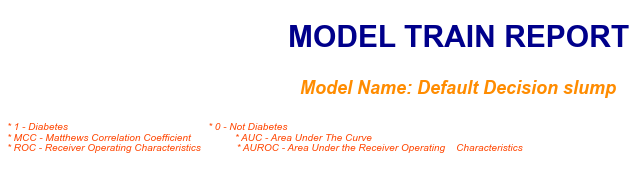

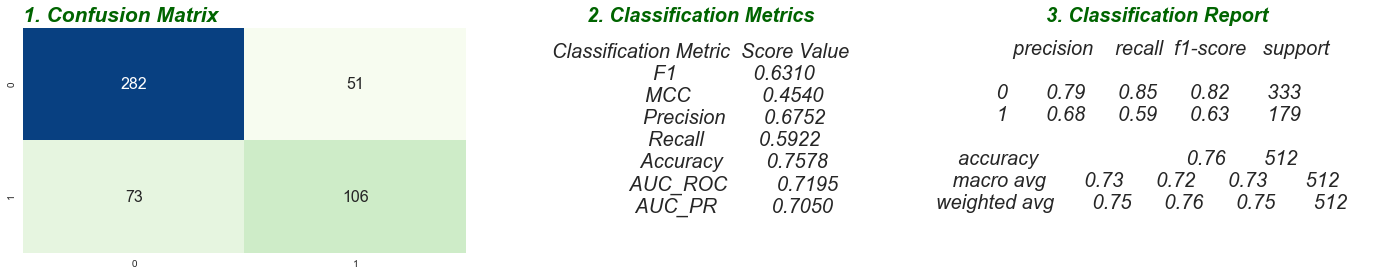

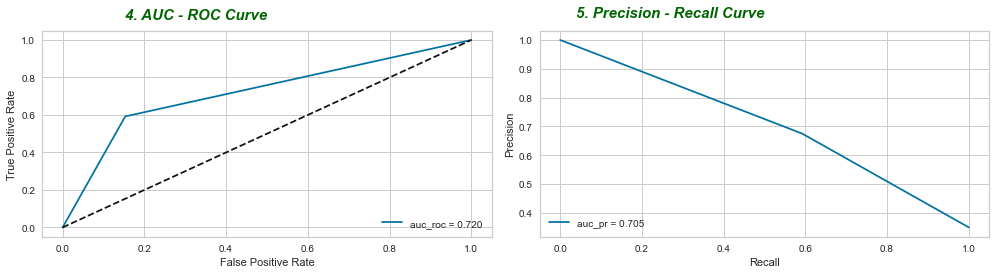

In [74]:
# for decision slump Encode the feature values from strings to integers since the sklearn DecisionTreeClassifier only takes numerical values
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(criterion="entropy",max_depth=1, random_state=42)

tree = tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(tree, X_train, y_train, model_name="Default Decision slump")

Decision Tree Hyperparameters Tuning

In [75]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}

Best Classifier: DecisionTreeClassifier(max_depth=2, max_features=4, min_samples_leaf=3,
                       min_samples_split=5, random_state=100)


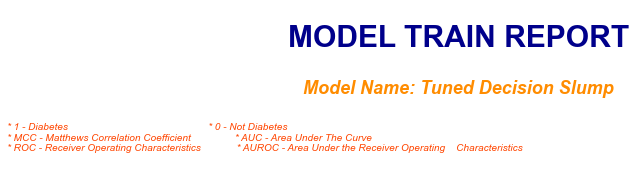

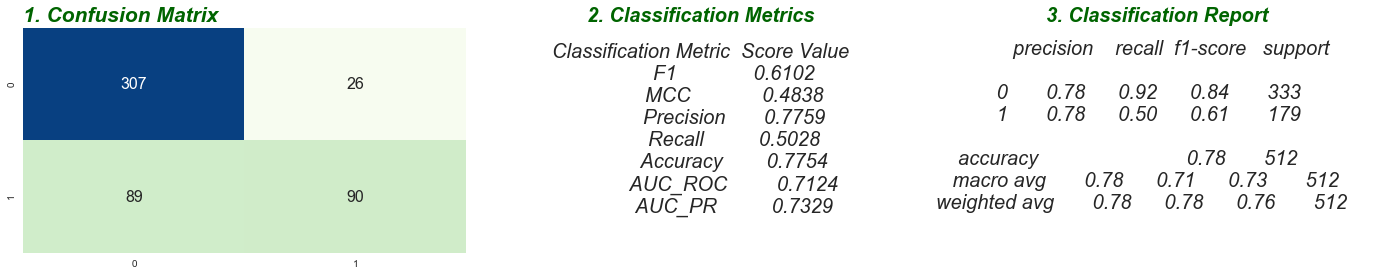

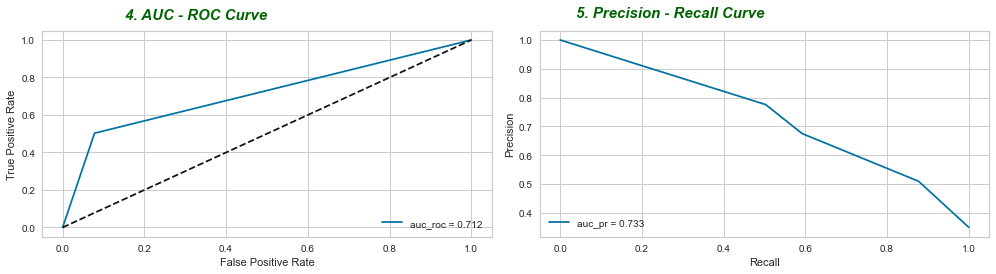

In [76]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_tree, X_train, y_train, model_name="Tuned Decision Slump")

Train Decision Tree Classifer j48

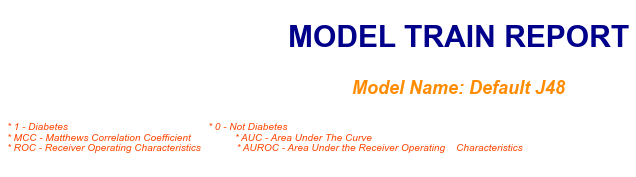

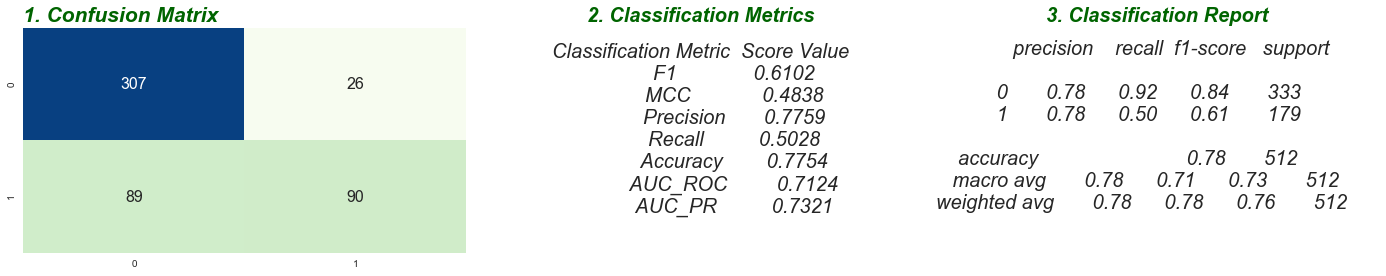

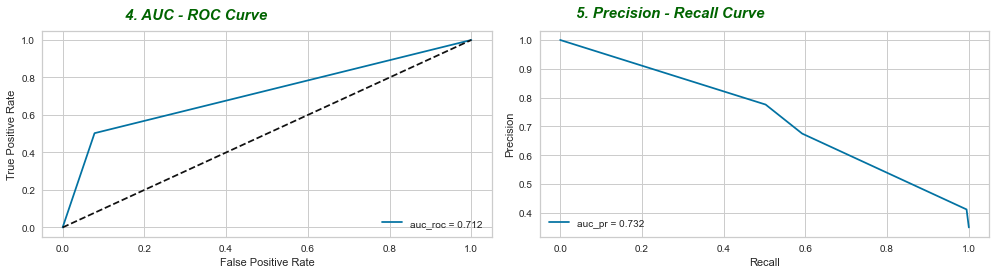

In [77]:
# Train Decision Tree Classifer j48

tree = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state=42)

tree = tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(tree, X_train, y_train, model_name="Default J48")

In [78]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(2, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(3, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 21, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 6}

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=3,
                       min_samples_leaf=6, min_samples_split=6,
                       random_state=100)


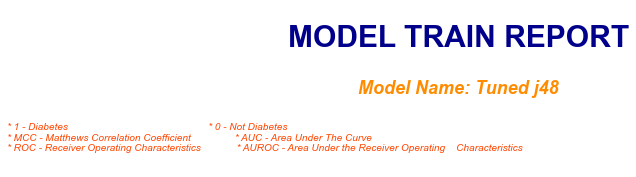

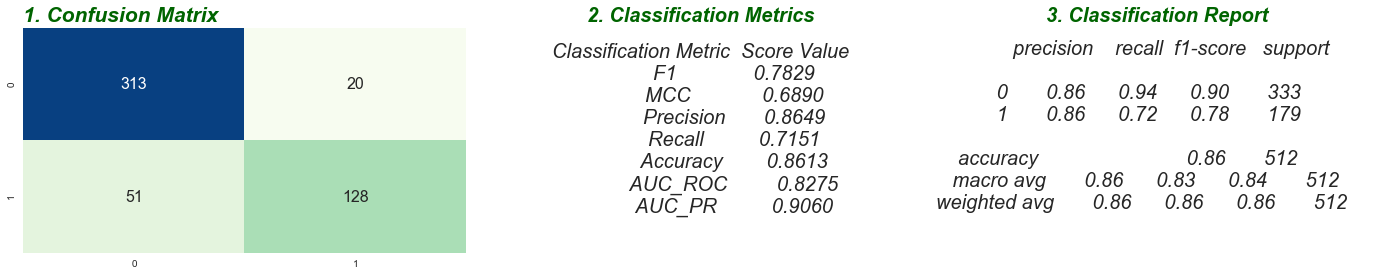

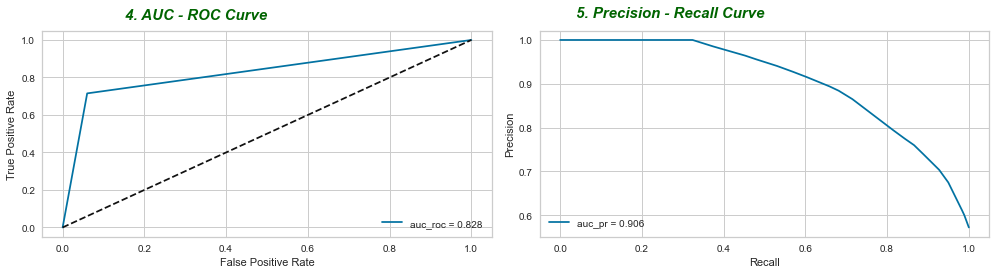

In [79]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_tree, X_train, y_test, model_name="Tuned j48")

Train Decision Tree Classifer CART → (Classification And Regression Tree)

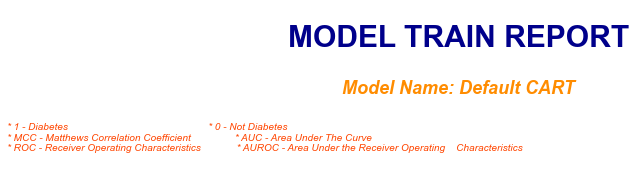

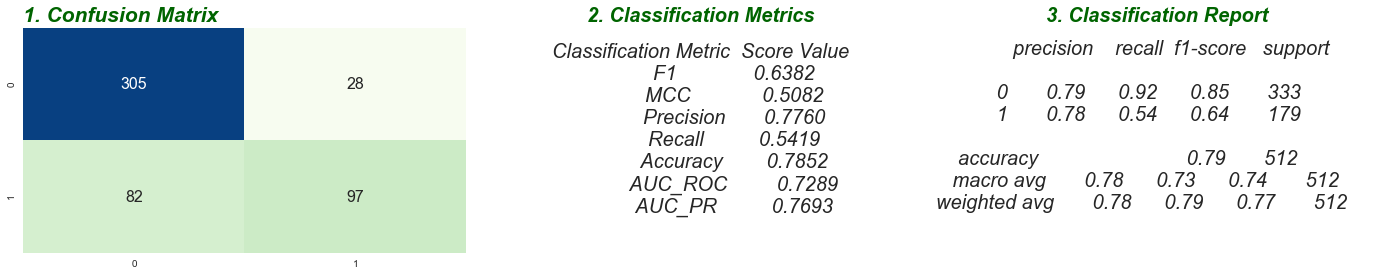

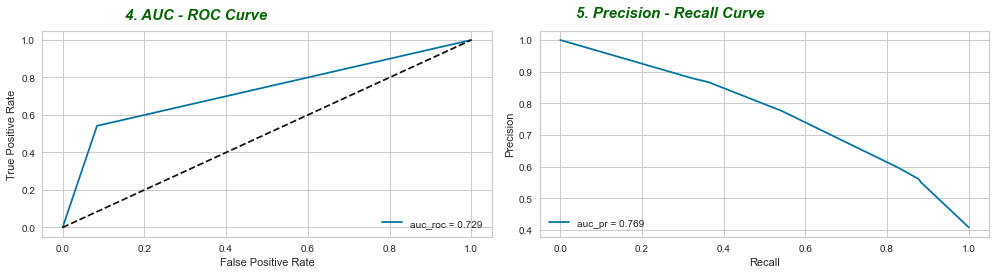

In [80]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3, max_leaf_nodes = 20, random_state=42)

tree = tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(tree, X_train, y_train, model_name="Default CART")

In [81]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(3, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(3, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 4}

Best Classifier: DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=6,
                       min_samples_split=4, random_state=100)


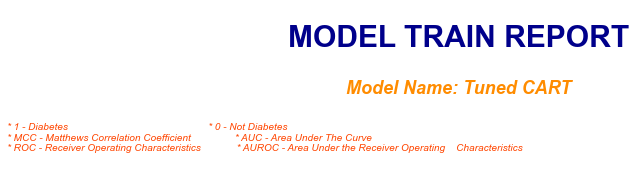

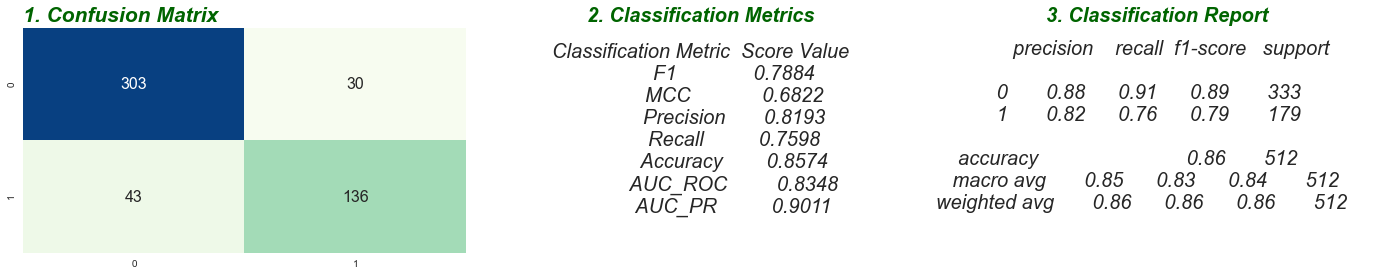

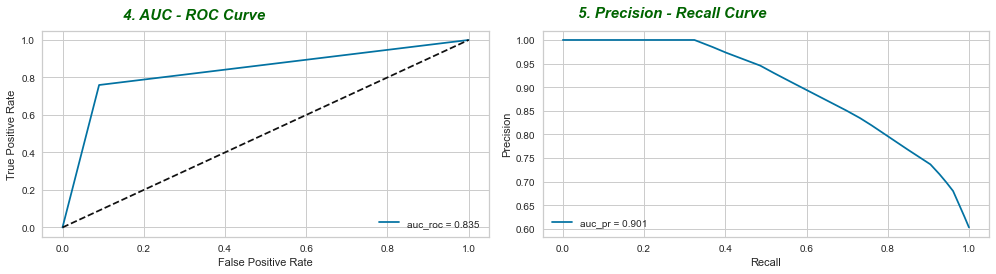

In [82]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_tree, X_train, y_train, model_name="Tuned CART")

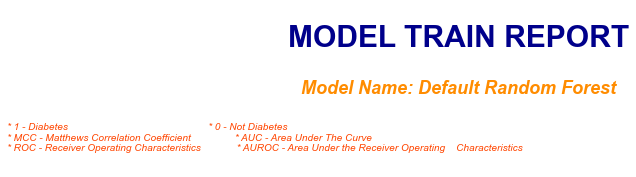

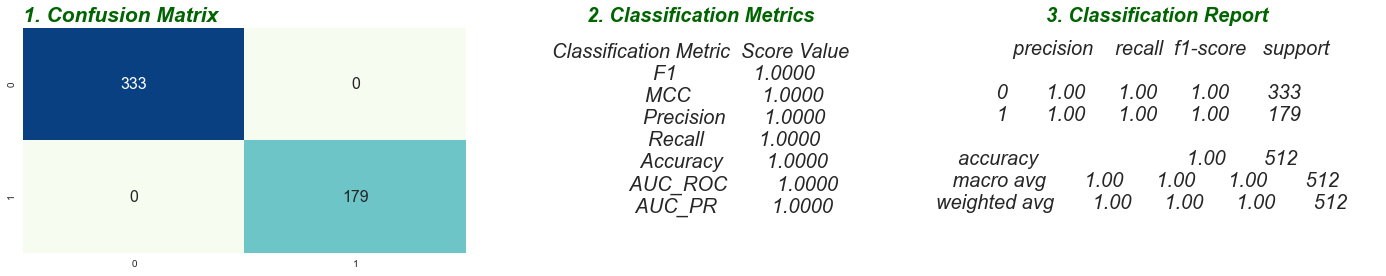

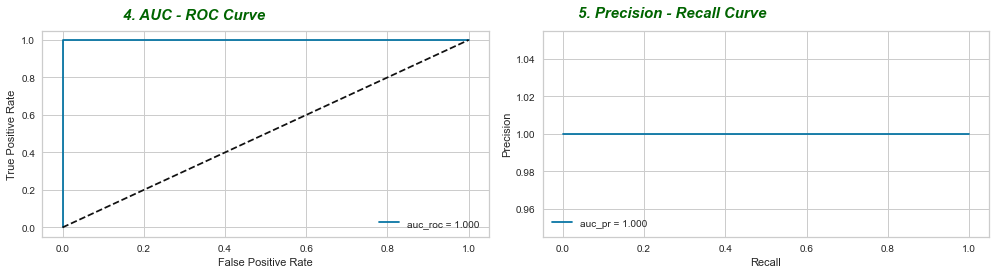

In [83]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

rfc = rfc.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(rfc, X_train, y_train, model_name="Default Random Forest")

In [84]:
rn_forest = RandomForestClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

# parameters to build the model on
param_grid = {"max_depth": range(4, 10), 
              "max_features": randint(1, 20), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 39, 'min_samples_split': 78, 'n_estimators': 2000}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=5,
                       min_samples_leaf=39, min_samples_split=78,
                       n_estimators=2000, n_jobs=-1, random_state=42)


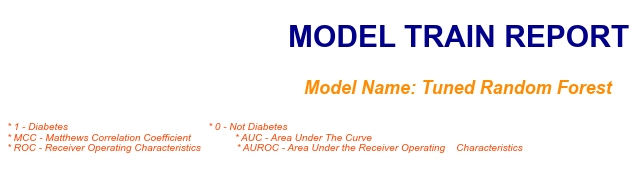

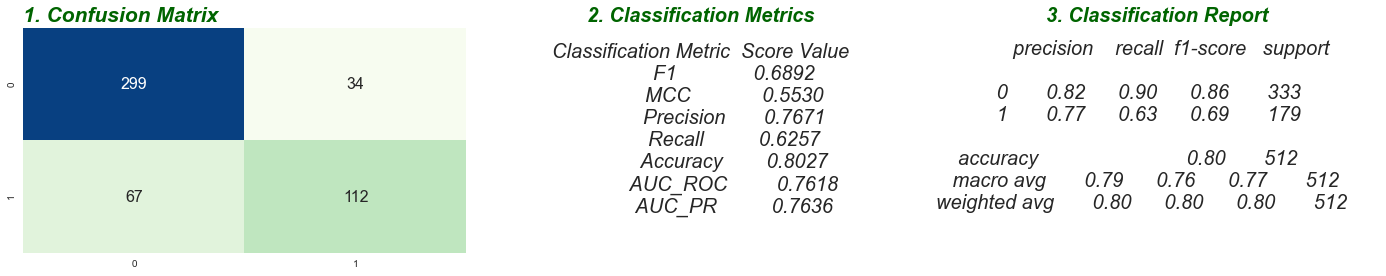

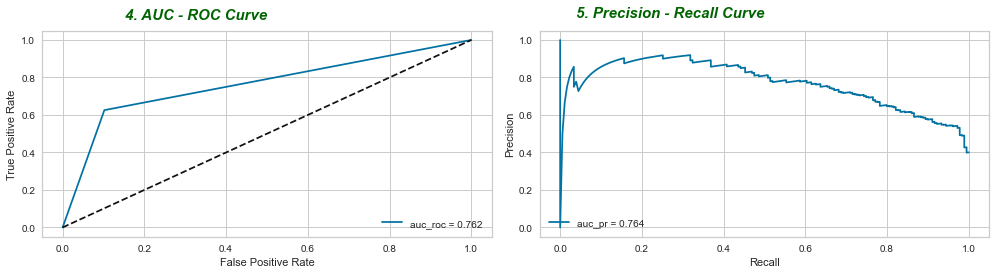

In [85]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_forest, X_train, y_train, model_name="Tuned Random Forest")

[20:10:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


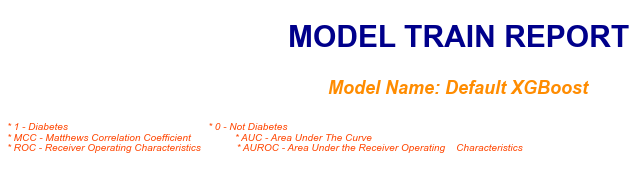

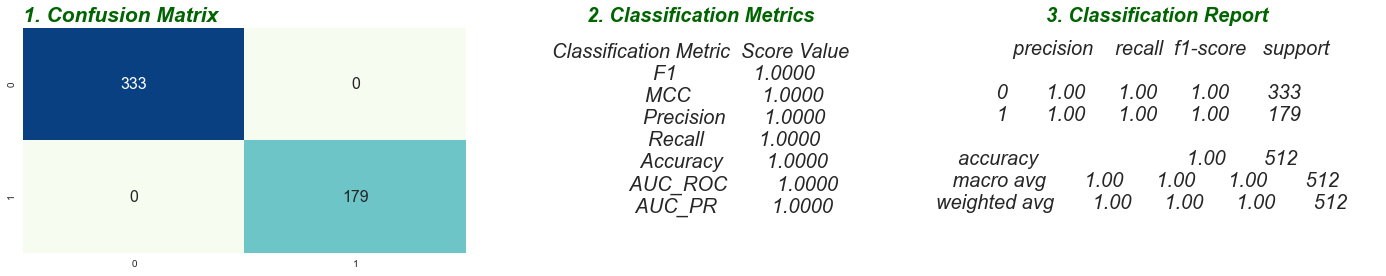

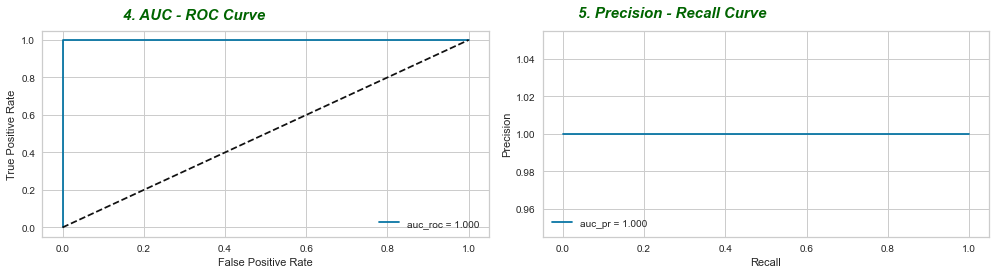

In [86]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

xgb = xgb.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(xgb, X_train, y_train, model_name="Default XGBoost")

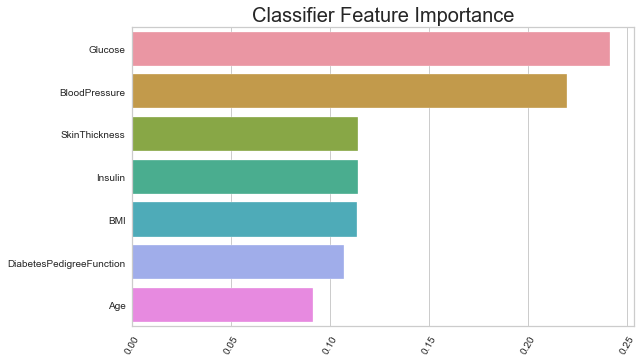

In [87]:
plot_model_feature_importances(model = xgb)

XG Boost Hyperparameters Tuning

In [88]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100, n_estimators=1000)

param_grid = {'max_depth': range(5, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

[20:10:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:11:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


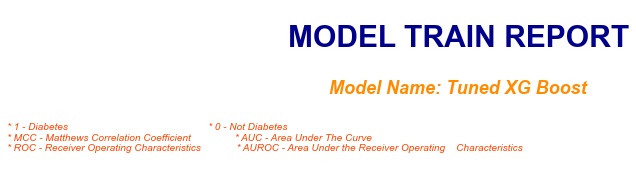

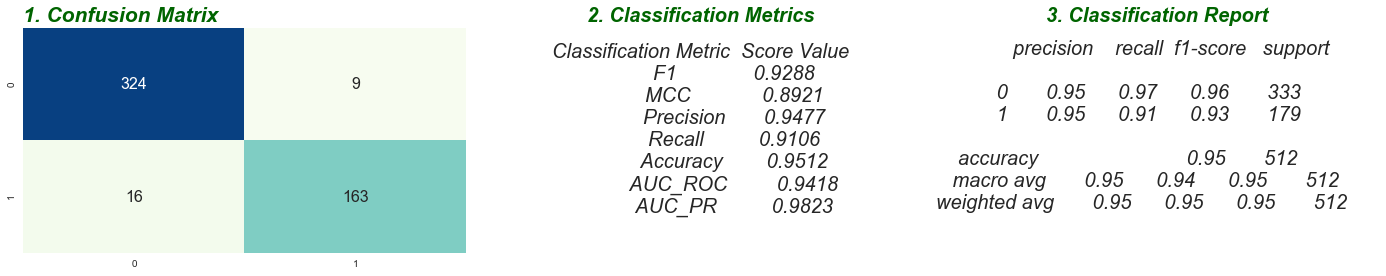

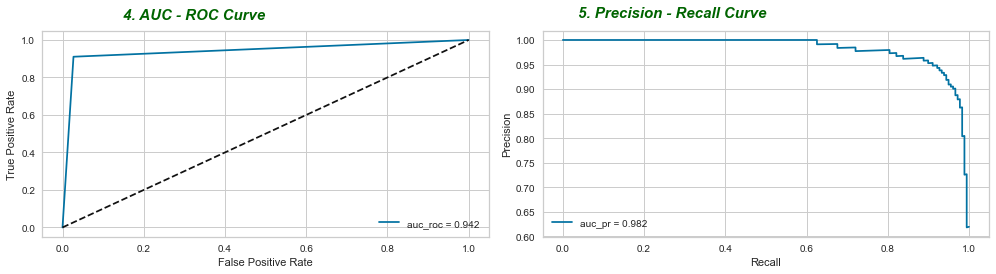

In [89]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_xgb, X_train, y_train, model_name="Tuned XG Boost")

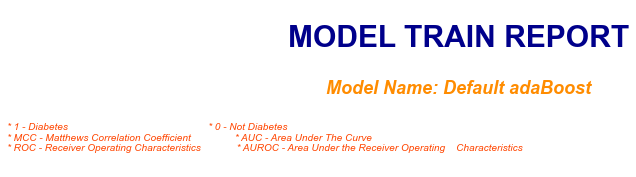

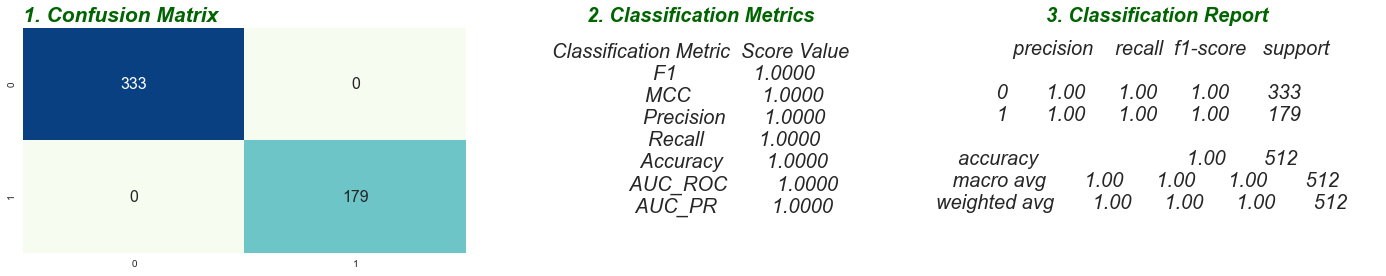

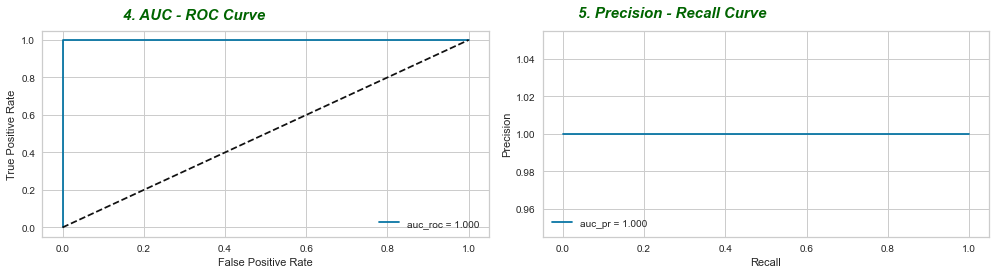

In [161]:
# adaBoost with Default Parameters
ada = AdaBoostClassifier(n_estimators=1000, random_state=42)

ada = ada.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(ada, X_train, y_train, model_name="Default adaBoost")

ada Boost Hyperparameters Tuning

In [91]:
# adaBoost with Default Parameters
ada = AdaBoostClassifier(random_state = 100, n_estimators=1000)

param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),}

# Instantiating RandomizedSearchCV object 
ada_grid = RandomizedSearchCV(ada, param_grid, cv = 5) 
    
# fitting the model for grid search 
ada_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", ada_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", ada_grid.best_estimator_)

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.1}

Best Classifier: AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=100)


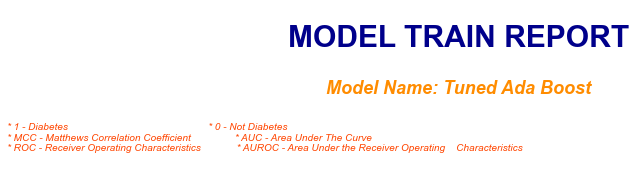

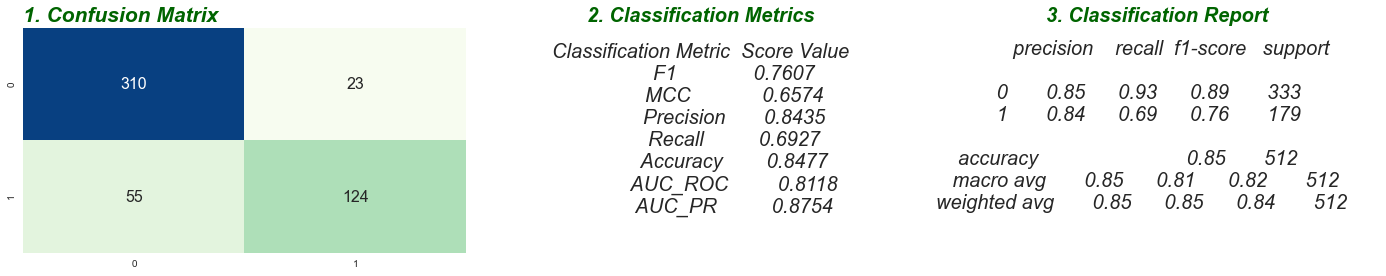

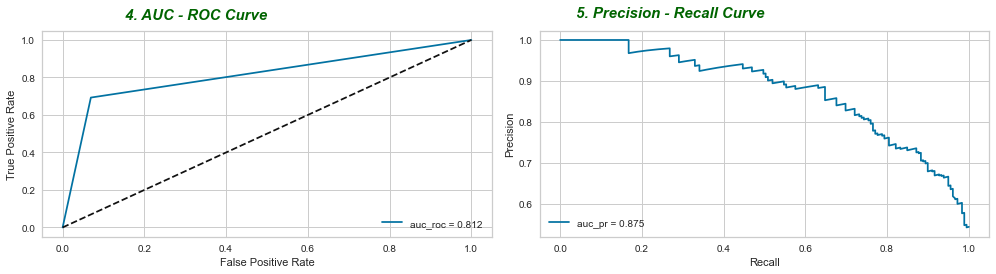

In [92]:
# adaBoost with Best Hypertuned Parameters
best_ada = ada_grid.best_estimator_

best_ada.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_ada, X_train, y_train, model_name="Tuned Ada Boost")

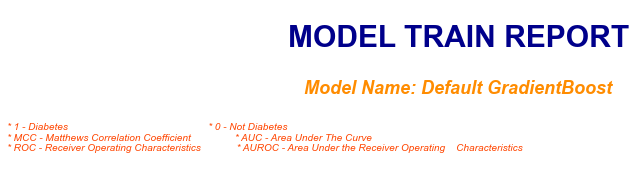

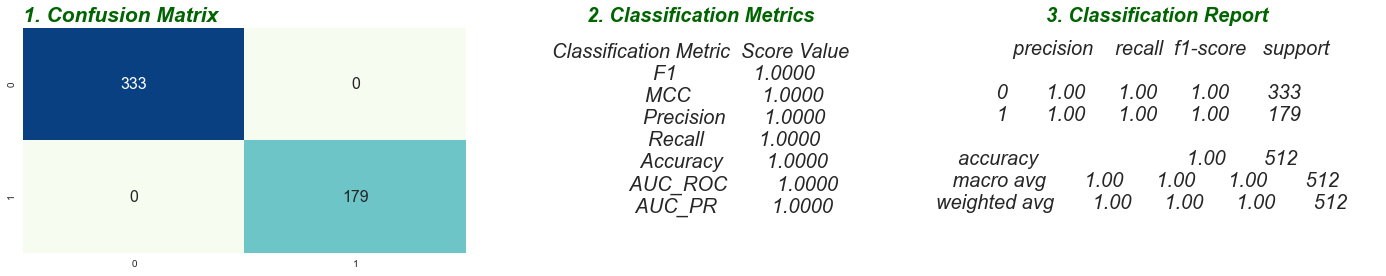

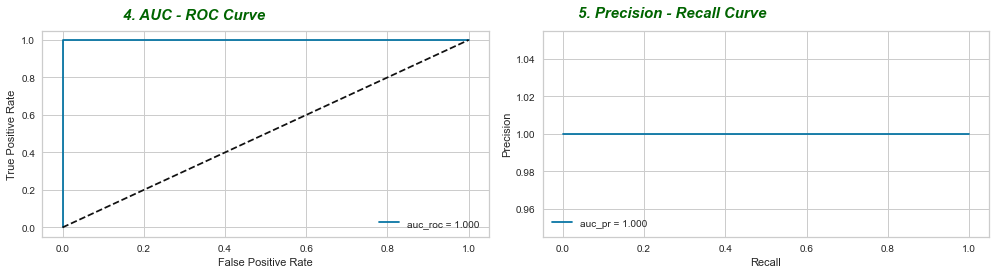

In [93]:
# GradientBoostingClassifierBoost with Default Parameters
grb = GradientBoostingClassifier(n_estimators=1000, random_state=42)

grb = grb.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(grb, X_train, y_train, model_name="Default GradientBoost")

In [94]:
# Grb with Default Parameters
grb = GradientBoostingClassifier(n_estimators=1000, random_state=42)

param_grid = {'max_depth': range(1, 40),
             'learning_rate': np.arange(0.1, 1.0, 0.1),
             'n_estimators': range(100, 1100, 100),
             'subsample': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
grb_grid= RandomizedSearchCV(grb, param_grid, cv = 5) 
    
# fitting the model for grid search 
grb_grid = grb_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", grb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grb_grid.best_estimator_)

Best Parameters: {'subsample': 0.4, 'n_estimators': 700, 'max_depth': 26, 'learning_rate': 0.30000000000000004}

Best Classifier: GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=26,
                           n_estimators=700, random_state=42, subsample=0.4)


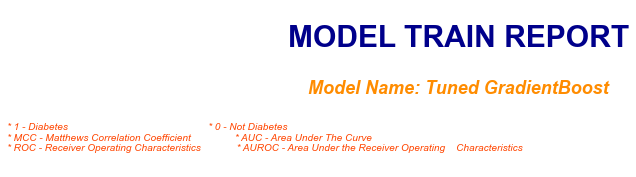

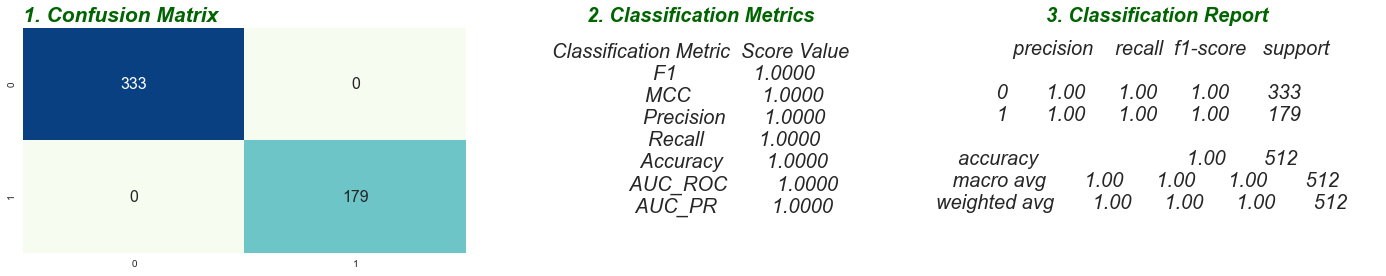

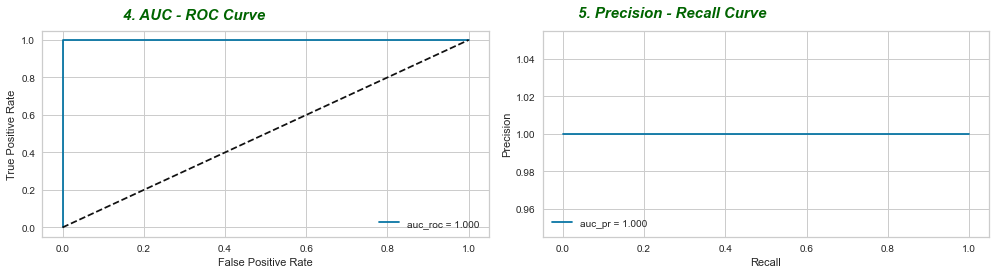

In [95]:
# gradientBoost with Best Hypertuned Parameters
best_grb = grb_grid.best_estimator_

best_grb.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Train_Classification_Report(best_grb, X_train, y_train, model_name="Tuned GradientBoost")

In [96]:
# Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

named_estimators = [ ("RandomForest", rfc), ("Xgboost", xgb) , ("adaboost", ada), ("graboost", grb)]

In [97]:
voting = VotingClassifier(named_estimators)

In [98]:
voting.fit(X_train, y_train)

[20:14:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('Xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, m...
                                            monotone_constraints=None,
                                            n_estimators

In [118]:
 eclf = VotingClassifier(
      estimators=[('rfc', rfc), ('grb', grb), ('ada', ada)],
        voting= 'hard')

In [121]:
for clf, label in zip([rcf, grb, ada, eclf], ['RandomForest', 'Xgboost', 'adaboost', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.f (+/- %0.f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 1 (+/- 0) [RandomForest]
Accuracy: 1 (+/- 0) [Xgboost]
Accuracy: 1 (+/- 0) [adaboost]
Accuracy: 1 (+/- 0) [Ensemble]


In [127]:
eclf = eclf.fit(X, y)
print(eclf.predict(X))

[1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [134]:
# Custom Function to get Scores and plots...
def Generate_Model_Test_Classification_Report(model, X_test, y_test, model_name=""):

    '''
    Purpose: 
        Generate the consolidated test classification report. 
        The report consists of the following classification results & metrics -
            1. Confusion Matrix
            2. Classification Report
            3. F1 Score
            4. Accuracy
            5. Mathews Correlation Coefficient (MCC)
            6. Precision
            7. Recall
            8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
            9. AUC-PR Score - Area Under the Precision Recall Curve.
            10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
            11. AUC-PR Curve - Area Under the Precision Recall Curve.

    Parameters:
        1. y_test - The Ground Truth for each test image.
        2. y_pred - The Predicted label for each image.
        3. model_name - Model Name

    Return Value: 
        NONE.
    '''

    # Report Title & Classification Mterics Abbreviations...
    fig, axes = plt.subplots(3, 1, figsize = (8, 3))
    axes[0].text(9, 1.8, "MODEL TEST REPORT", fontsize=30, horizontalalignment='center', 
                 color='DarkBlue', weight = 'bold')

    axes[0].axis([0, 10, 0, 10])
    axes[0].axis('off')

    axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                         fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')

    axes[2].text(0, 4, "* 1 - Diabtes\t\t\t\t\t\t\t * 0 - Not Diabetes\n".expandtabs() +
                 "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                 "* ROC - Receiver Operating Characteristics     " + 
                 "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                 style='italic', fontsize=10, horizontalalignment='left', color='orangered')

    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')

    scores = []
    metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
               'AUC_ROC  ', 'AUC_PR   ']

    # Plot ROC and PR curves using all models and test data...
    y_pred = model.predict(X_test.values)
    y_pred_probs = model.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
    precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

    # Calculate the individual classification metic scores...
    model_f1_score = f1_score(y_test, y_pred)
    model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
    model_precision_score = precision_score(y_test, y_pred)
    model_recall_score = recall_score(y_test, y_pred)
    model_accuracy_score = accuracy_score(y_test, y_pred)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(recall, precision)

    scores.append([model_f1_score,
                   model_matthews_corrcoef_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr])

    sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
    for i in range(len(scores[0])):
        sampling_results.loc[i] = [metrics[i], scores[0][i]]

    sampling_results.index = np.arange(1, len(sampling_results) + 1)

    class_report = classification_report(y_test, y_pred)
    conf_matx = confusion_matrix(y_test, y_pred)

    # Display the Confusion Matrix...
    fig, axes = plt.subplots(1, 3, figsize = (20, 4))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
    axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                      style='italic', loc='left', y=0.80)

    # Classification Metrics
    axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                 fontsize=20, horizontalalignment='center')
    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')
    axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    # Classification Report
    axes[2].text(0, 1, class_report, style='italic', fontsize=20)
    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')
    axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    plt.tight_layout()
    plt.show()

    # AUC-ROC & Precision-Recall Curve
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=1, y=1.05)

    axes[1].legend(loc = "lower left")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=3, y=1.05)

    plt.subplots_adjust(top=0.95) 
    plt.tight_layout()
    plt.show()
    
##########################################################################################################################
    
def plot_model_feature_importances(model):
    '''
    Custom function to plot the 
    feature importances of the classifier.
    '''
    fig = plt.figure()
    
    # get the feature importance of the classifier 'model'
    feature_importances = pd.Series(model.feature_importances_,
                            index = X_train.columns) \
                    .sort_values(ascending=False)
    
    # plot the bar chart
    sns.barplot(x = feature_importances, y = X_train.columns)
    plt.title('Classifier Feature Importance', fontdict = {'fontsize' : 20})
    plt.xticks(rotation = 60)
    plt.show()

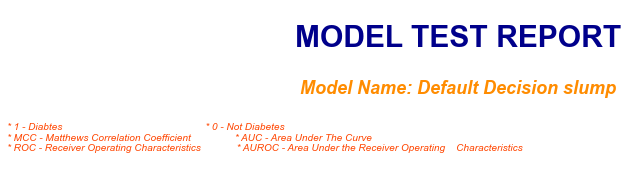

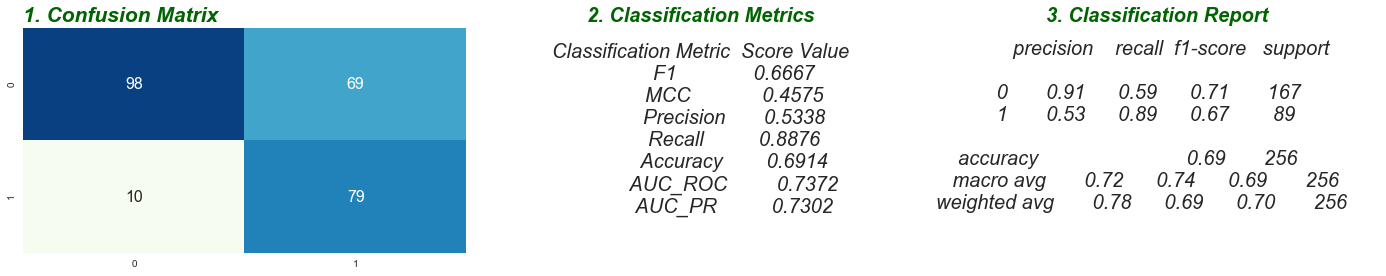

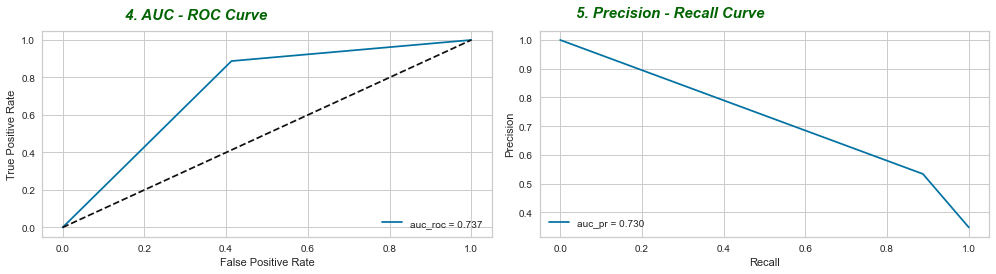

In [135]:
# for decision slump Encode the feature values from strings to integers since the sklearn DecisionTreeClassifier only takes numerical values
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(criterion="entropy",max_depth=1, random_state=42)

tree = tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision slump")

In [136]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Classifier: DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=5,
                       random_state=100)


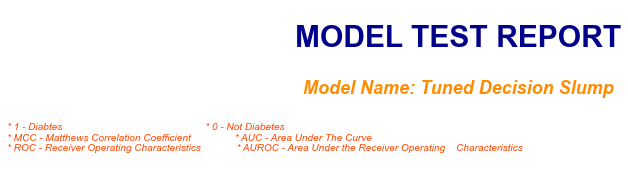

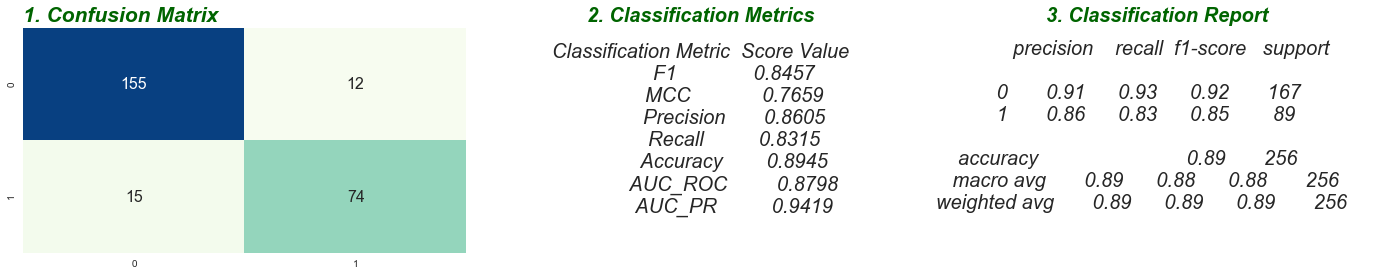

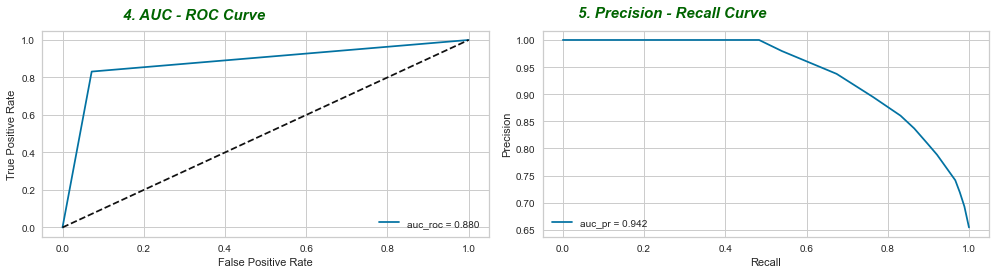

In [137]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned Decision Slump")

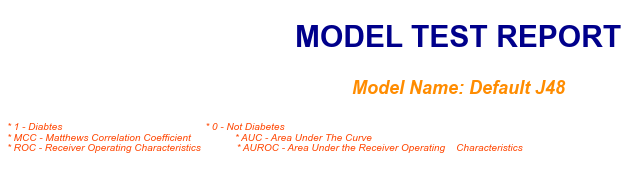

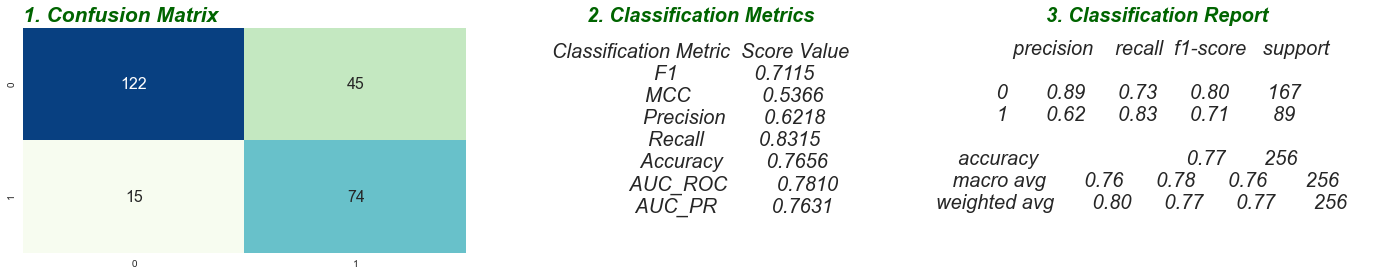

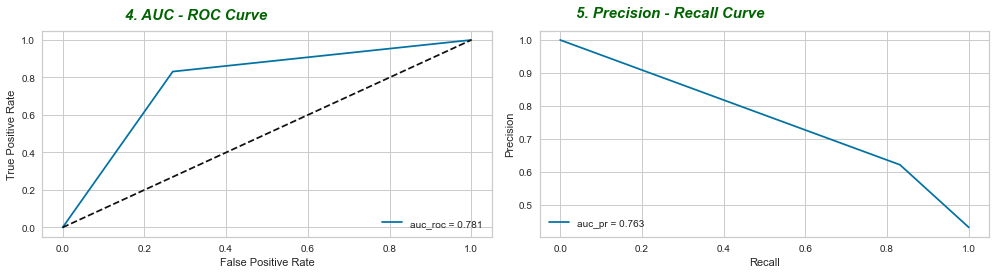

In [139]:
# Train Decision Tree Classifer j48

tree = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state=42)

tree = tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default J48")

In [140]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(2, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(3, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 13, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 7}

Best Classifier: DecisionTreeClassifier(max_depth=13, max_features=5, min_samples_leaf=5,
                       min_samples_split=7, random_state=100)


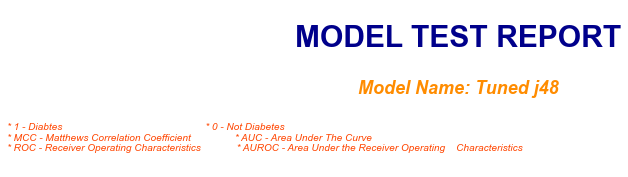

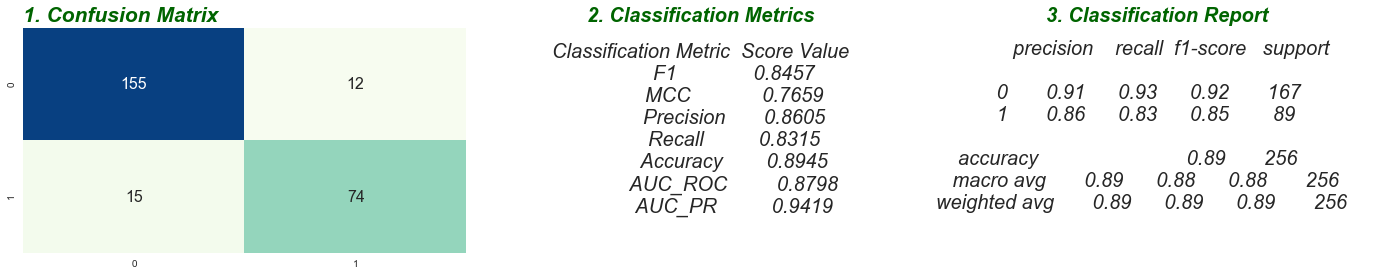

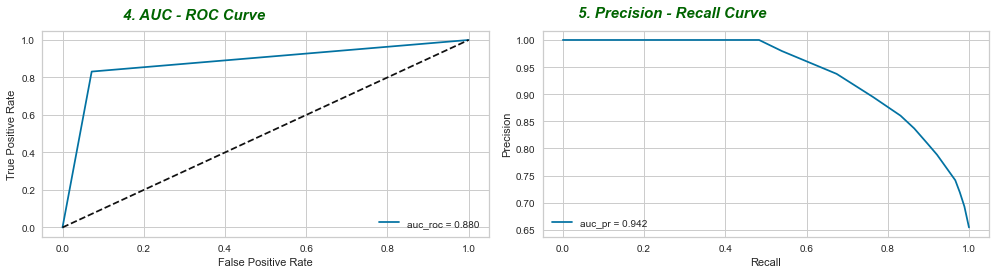

In [142]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned j48")

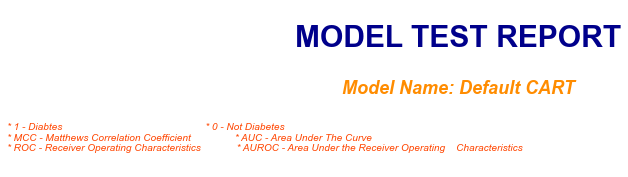

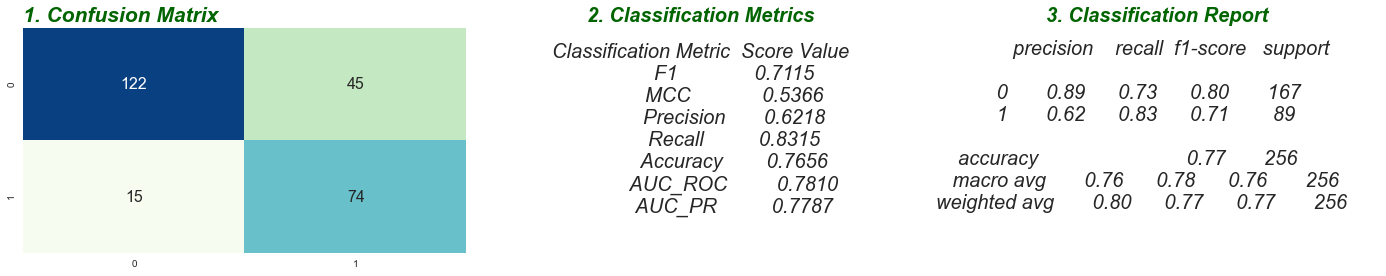

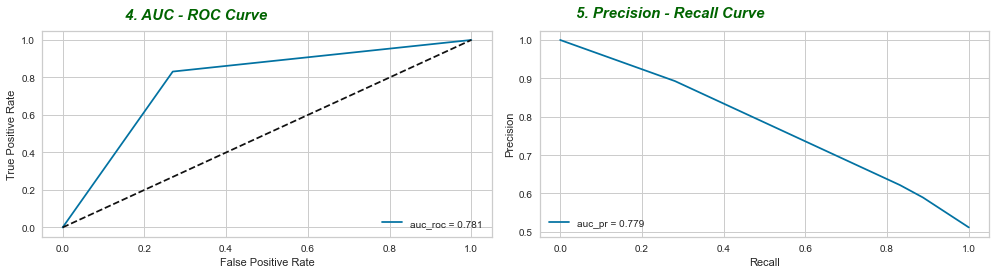

In [143]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3, max_leaf_nodes = 20, random_state=42)

tree = tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default CART")

In [144]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(3, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(3, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 21, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 7}

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=6,
                       min_samples_leaf=2, min_samples_split=7,
                       random_state=100)


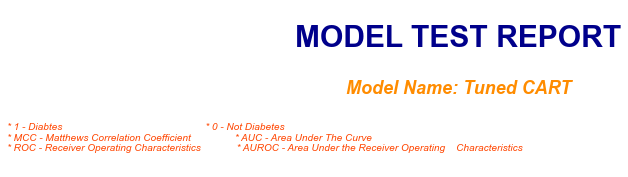

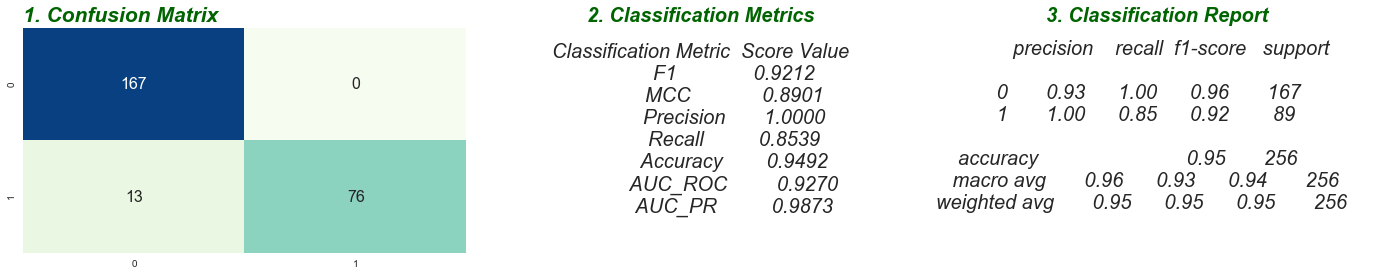

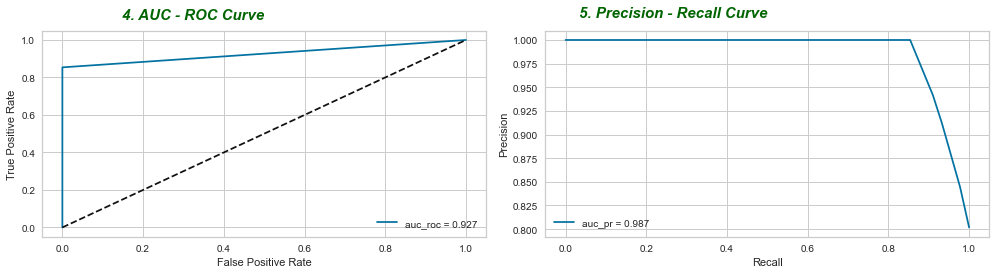

In [145]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned CART")

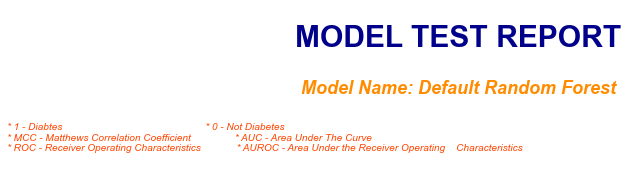

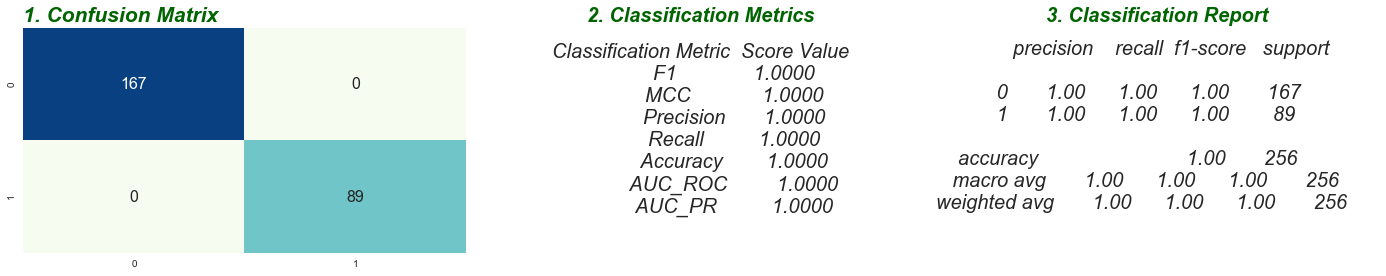

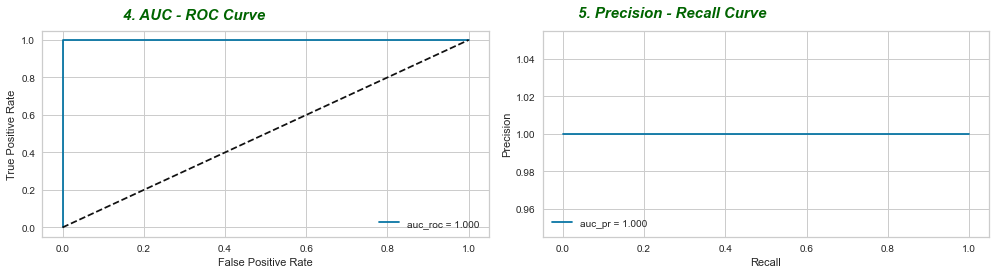

In [146]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

rfc = rfc.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Default Random Forest")

In [147]:
rn_forest = RandomForestClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

# parameters to build the model on
param_grid = {"max_depth": range(4, 10), 
              "max_features": randint(1, 20), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 26, 'min_samples_split': 84, 'n_estimators': 7000}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=4,
                       min_samples_leaf=26, min_samples_split=84,
                       n_estimators=7000, n_jobs=-1, random_state=42)


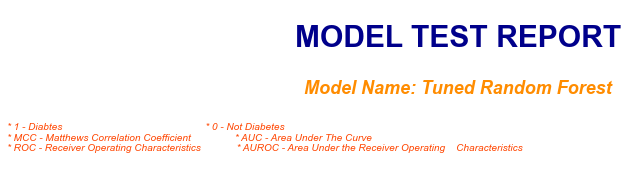

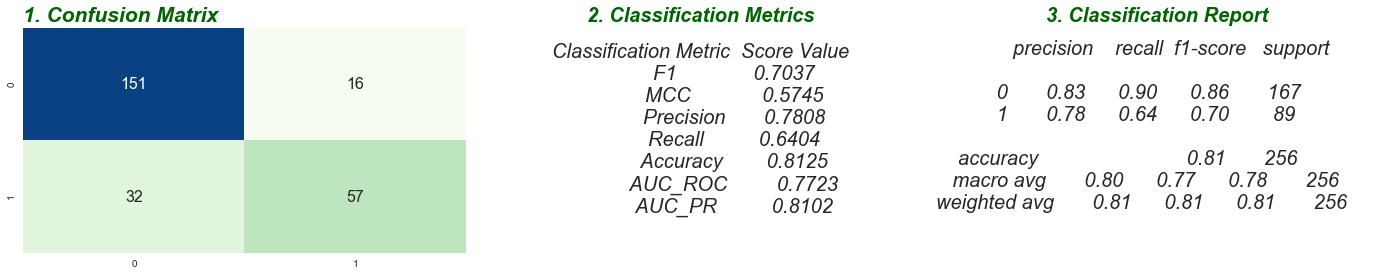

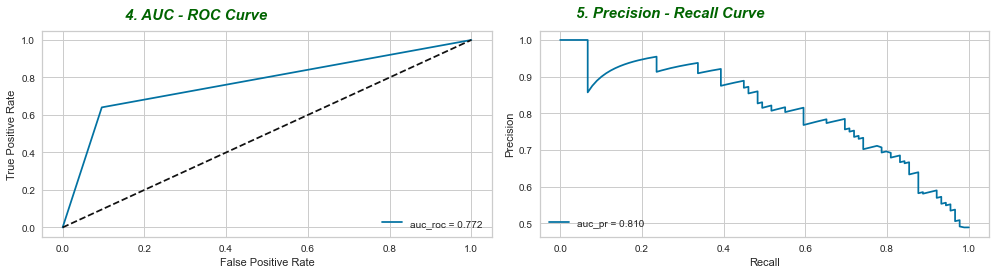

In [148]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_forest, X_test, y_test, model_name="Tuned Random Forest")

[21:30:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


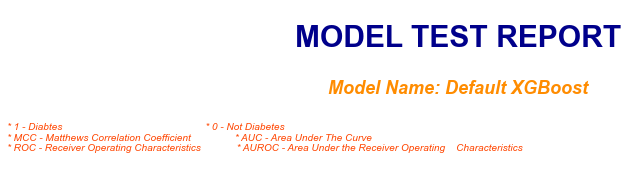

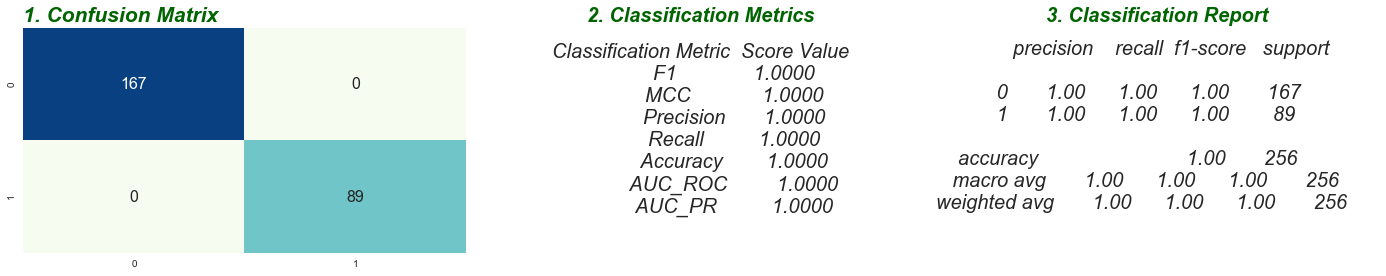

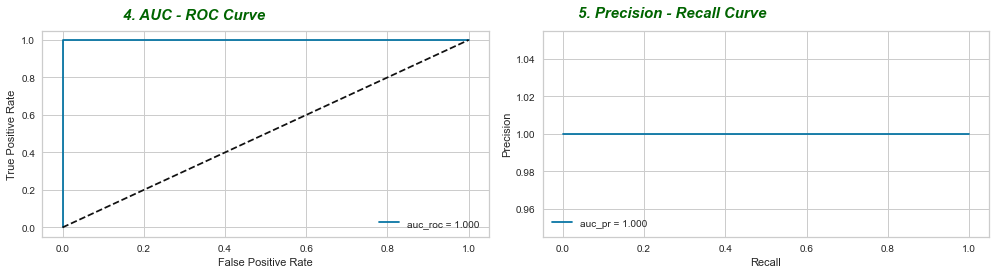

In [149]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, n_estimators=1000, random_state=42)

xgb = xgb.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(xgb, X_test, y_test, model_name="Default XGBoost")

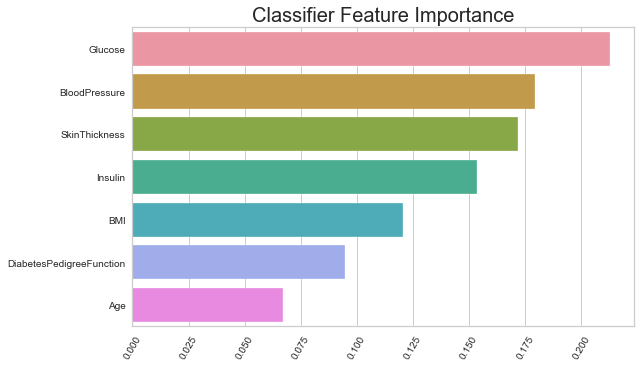

In [150]:
plot_model_feature_importances(model = xgb)

In [151]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100, n_estimators=1000)

param_grid = {'max_depth': range(5, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

[21:31:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:32:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


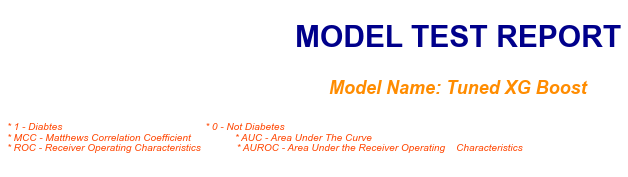

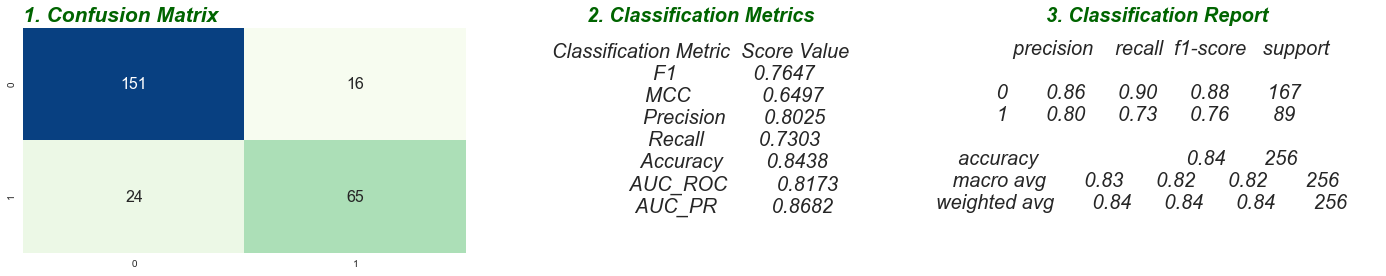

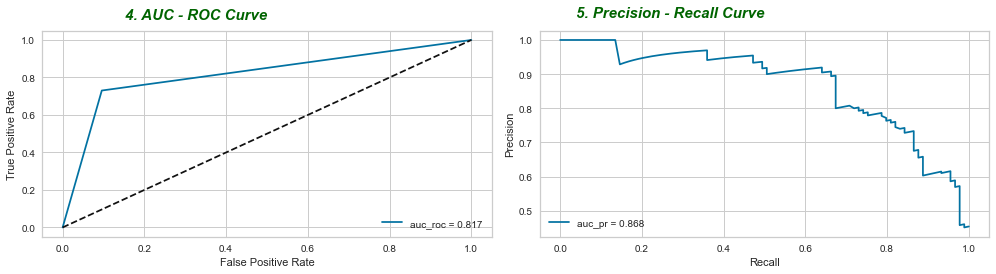

In [153]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_xgb, X_test, y_test, model_name="Tuned XG Boost")

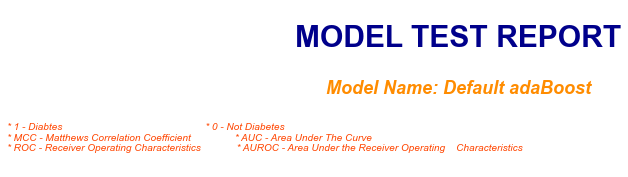

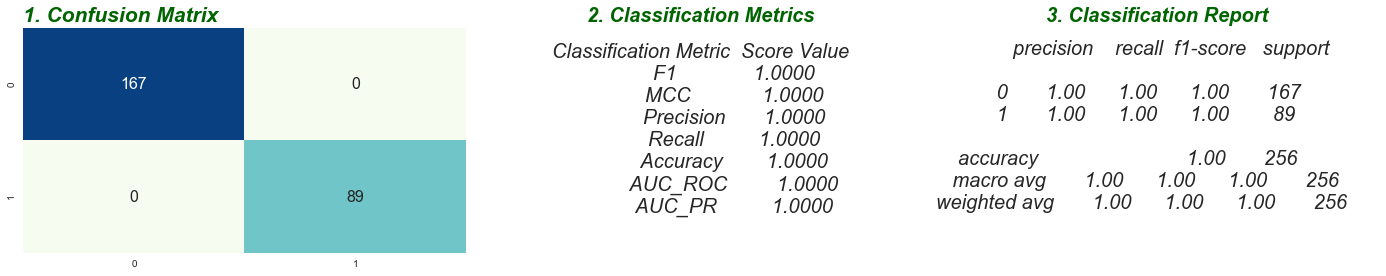

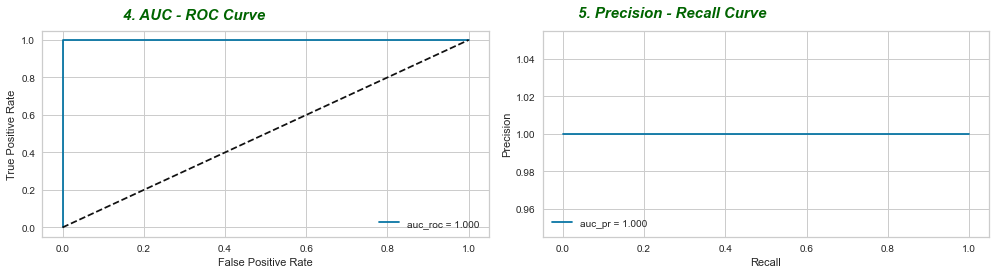

In [154]:
# adaBoost with Default Parameters
ada = AdaBoostClassifier(n_estimators=1000, random_state=42)

ada = ada.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(ada, X_test, y_test, model_name="Default adaBoost")

In [155]:
# adaBoost with Default Parameters
ada = AdaBoostClassifier(random_state = 100, n_estimators=1000)

param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),}

# Instantiating RandomizedSearchCV object 
ada_grid = RandomizedSearchCV(ada, param_grid, cv = 5) 
    
# fitting the model for grid search 
ada_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", ada_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", ada_grid.best_estimator_)

Best Parameters: {'n_estimators': 600, 'learning_rate': 0.01}

Best Classifier: AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=100)


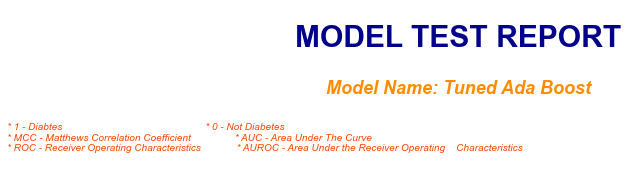

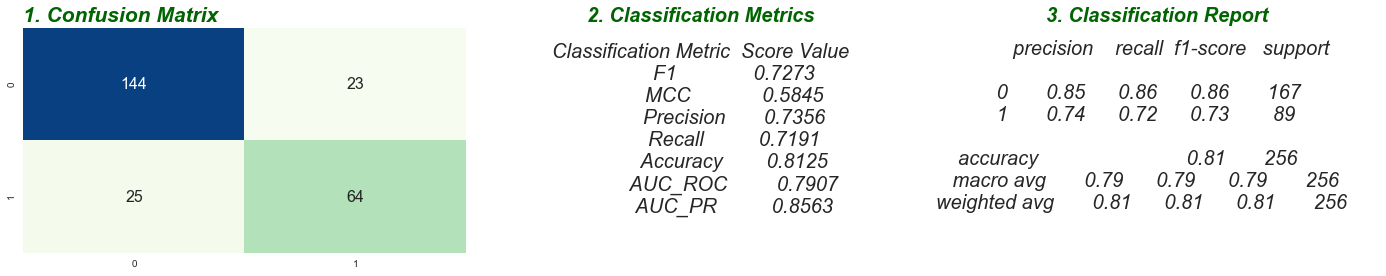

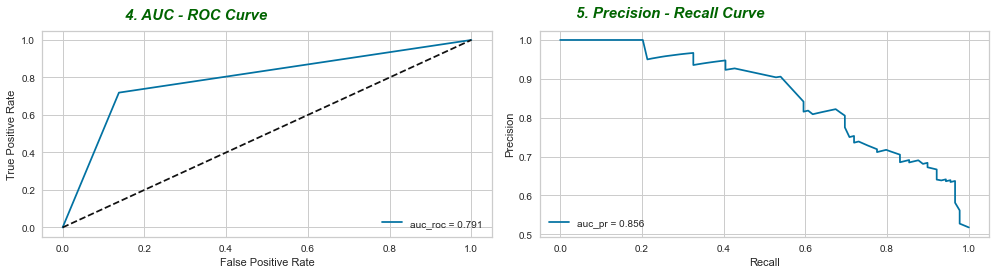

In [156]:
# adaBoost with Best Hypertuned Parameters
best_ada = ada_grid.best_estimator_

best_ada.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_ada, X_test, y_test, model_name="Tuned Ada Boost")

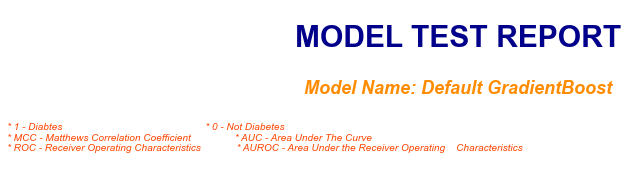

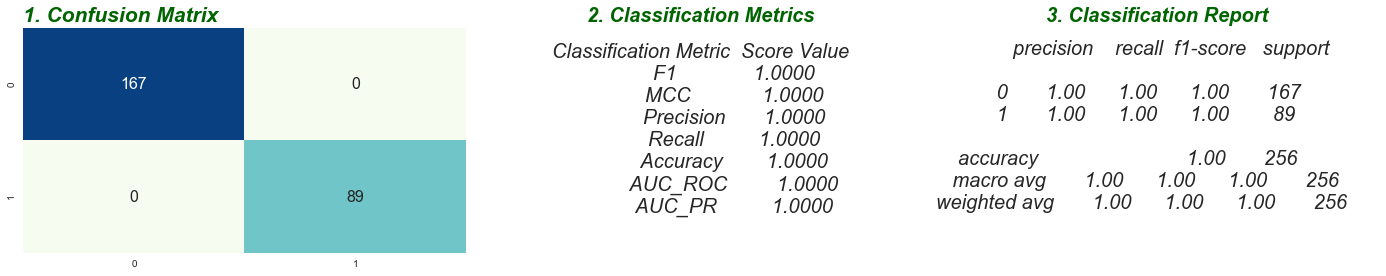

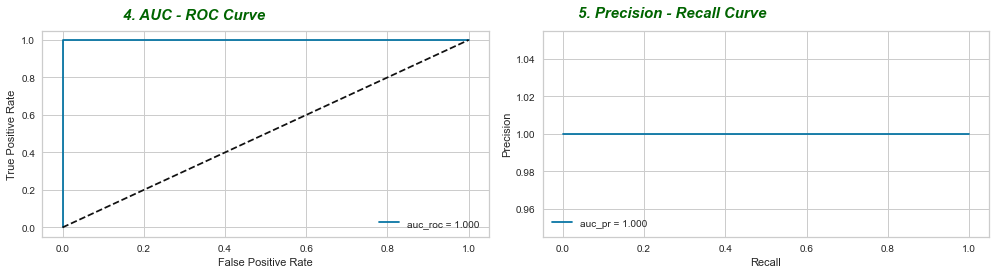

In [157]:
# GradientBoostingClassifierBoost with Default Parameters
grb = GradientBoostingClassifier(n_estimators=1000, random_state=42)

grb = grb.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(grb, X_test, y_test, model_name="Default GradientBoost")

In [158]:
# Grb with Default Parameters
grb = GradientBoostingClassifier(n_estimators=1000, random_state=42)

param_grid = {'max_depth': range(1, 40),
             'learning_rate': np.arange(0.1, 1.0, 0.1),
             'n_estimators': range(100, 1100, 100),
             'subsample': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
grb_grid= RandomizedSearchCV(grb, param_grid, cv = 5) 
    
# fitting the model for grid search 
grb_grid = grb_grid.fit(X_test.values, y_test.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", grb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grb_grid.best_estimator_)

Best Parameters: {'subsample': 0.7000000000000001, 'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.1}

Best Classifier: GradientBoostingClassifier(max_depth=16, n_estimators=200, random_state=42,
                           subsample=0.7000000000000001)


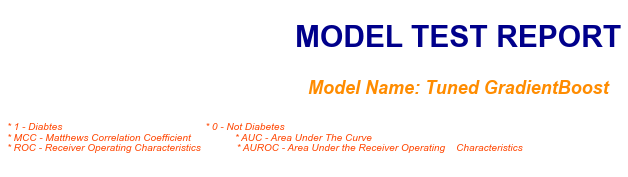

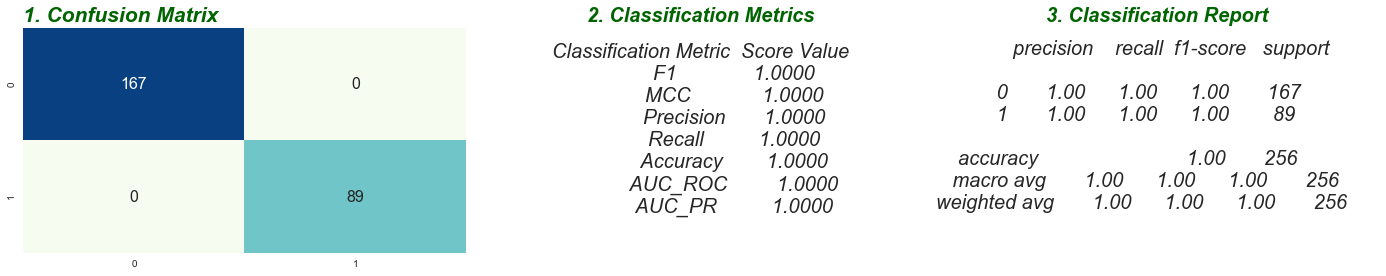

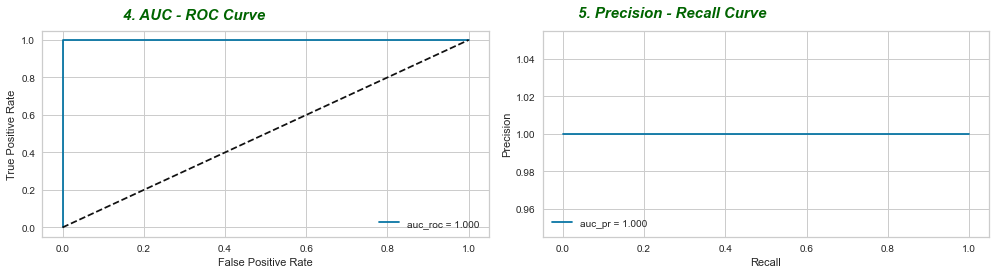

In [159]:
# gradientBoost with Best Hypertuned Parameters
best_grb = grb_grid.best_estimator_

best_grb.fit(X_test.values, y_test.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(best_grb, X_test, y_test, model_name="Tuned GradientBoost")

In [160]:
for clf, label in zip([rcf, grb, ada, eclf], ['RandomForest', 'Xgboost', 'adaboost', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.f (+/- %0.f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 1 (+/- 0) [RandomForest]
Accuracy: 1 (+/- 0) [Xgboost]
Accuracy: 1 (+/- 0) [adaboost]
Accuracy: 1 (+/- 0) [Ensemble]
